In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,max_salary,avg_salary,company_txt,job_state,age,python_yn,analysis_yn,spark,aws,Excel
0,2024 University Graduate - Data Scientist,Employer Provided Salary:$83K - $153K,Our Company\n\nChanging the world through digi...,4.4,Adobe\n4.4,"San Jose, CA",10000+ Employees,1982,Company - Public,Computer Hardware Development,...,153,118.0,Adobe\n,CA,41,1,1,0,0,0
1,Data Scientist – Entry Level 2024,Employer Provided Salary:$71K - $133K,Introduction\nRanked by Forbes as one of the w...,3.9,IBM\n3.9,"Atlanta, GA",10000+ Employees,1911,Company - Public,Information Technology Support Services,...,133,102.0,IBM\n,GA,112,0,0,0,0,0
2,Data Scientist 2,Employer Provided Salary:$94K - $183K,The Microsoft 365 team is looking for a Data S...,4.3,Microsoft\n4.3,"Redmond, WA",10000+ Employees,1975,Company - Public,Computer Hardware Development,...,183,138.5,Microsoft\n,WA,48,0,0,0,1,0
3,Entry Level Data Scientist 2023/2024,$48K - $78K (Glassdoor est.),"You may not realize it, but you’ve likely used...",3.9,CPChem\n3.9,"The Woodlands, TX",1001 to 5000 Employees,2000,Company - Private,Chemical Manufacturing,...,78,63.0,CPChem\n,TX,23,0,0,0,0,0
4,Data Scientist (C),Employer Provided Salary:$65.00 - $75.00 Per Hour,The Team:\nAt Client’s Artificial Intelligence...,-1.0,IVID TEK INC,Remote,1 to 50 Employees,-1,Company - Public,-1,...,75,70.0,IVID TEK INC,Remote,-1,0,0,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'analysis_yn', 'spark', 'aws', 'Excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data scientist    949
na                 99
data engineer      31
analyst            30
mle                12
manager             3
director            1
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        864
senior    253
jr          8
Name: seniority, dtype: int64

In [9]:
df['job_state'] = df.job_state.apply(lambda x:x.strip() if x.strip().lower()!= 'United States' else 'CA')
df.job_state.value_counts()


CA                225
Remote             92
VA                 83
NJ                 74
MA                 64
TX                 50
NY                 47
OH                 47
CO                 39
PA                 37
NC                 36
MI                 30
MD                 29
IL                 28
UT                 27
IA                 20
RI                 20
FL                 19
CT                 18
WA                 18
DC                 15
GA                 14
United States      10
AZ                  8
WI                  8
-1                  8
MO                  7
DE                  6
MN                  6
LA                  5
AL                  4
California          4
Maryland            3
AR                  3
IN                  2
OR                  2
NE                  2
NM                  2
KY                  2
New York State      1
KS                  1
NV                  1
ME                  1
Point Loma          1
Illinois            1
ND        

In [10]:
##  Job description length
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len'] 

0       4862
1       1444
2       2003
3        873
4       1247
        ... 
1120    1231
1121     688
1122    1153
1123    1082
1124    1206
Name: desc_len, Length: 1125, dtype: int64

In [11]:
##  hourly wage to annual
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [12]:
df[df.hourly ==1][['hourly', 'min_salary', 'max_salary']]

,hourly,min_salary,max_salary
4,1,130,150
8,1,102,138
13,1,186,242
23,1,102,104
36,1,80,90
...,...,...,...
1072,1,140,146
1086,1,120,120
1095,1,140,146
1109,1,120,120


In [13]:
df['company_txt'] = df['company_txt'].str.replace('\n',' ')

In [14]:
df['company_txt']

0                        Adobe 
1                          IBM 
2                    Microsoft 
3                       CPChem 
4                  IVID TEK INC
                 ...           
1120       JPMorgan Chase & Co 
1121                    Cydcor 
1122     Green Dot Corporation 
1123             S4 Market Data
1124    The University of Iowa 
Name: company_txt, Length: 1125, dtype: object

In [15]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,python_yn,analysis_yn,spark,aws,Excel,desc_len
count,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000,1125.000000
mean,3.311022,1464.339556,0.057778,0.489778,103.061333,146.442667,120.977333,47.460444,0.112000,0.421333,0.016000,0.069333,0.145778,1193.990222
std,1.673975,853.735102,0.233427,0.500118,31.507735,44.193681,38.048587,62.534955,0.315507,0.493992,0.125531,0.254133,0.353040,938.155974
min,-1.000000,-1.000000,0.000000,0.000000,5.000000,7.000000,6.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,3.400000,-1.000000,0.000000,0.000000,82.000000,120.000000,100.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,703.000000
50%,3.900000,1955.000000,0.000000,0.000000,96.000000,136.000000,113.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,966.000000
75%,4.100000,1999.000000,0.000000,1.000000,120.000000,159.000000,136.000000,67.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1299.000000
max,5.000000,2022.000000,1.000000,1.000000,310.000000,395.000000,334.500000,398.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7972.000000


In [16]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'analysis_yn', 'spark', 'aws', 'Excel', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

<Axes: >

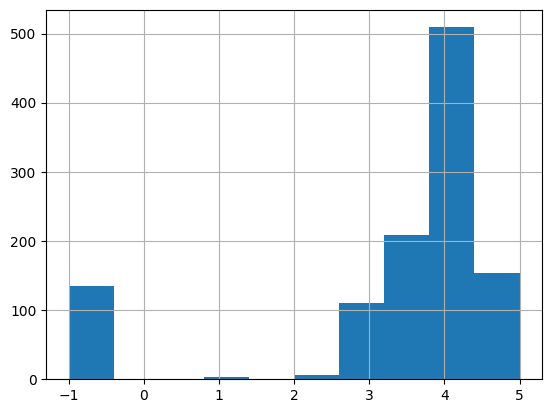

In [17]:
df.Rating.hist()

<Axes: >

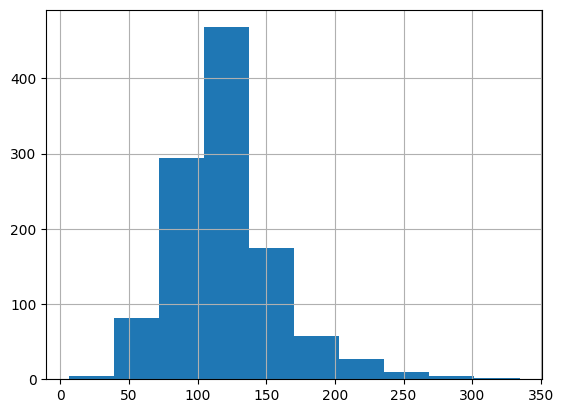

In [18]:
df.avg_salary.hist()

<Axes: >

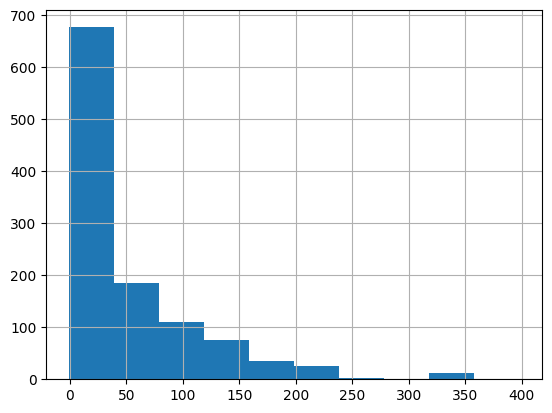

In [19]:
df.age.hist()

<Axes: >

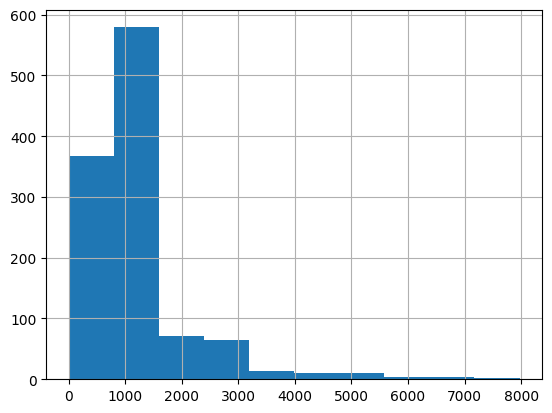

In [20]:
df.desc_len.hist()

<Axes: >

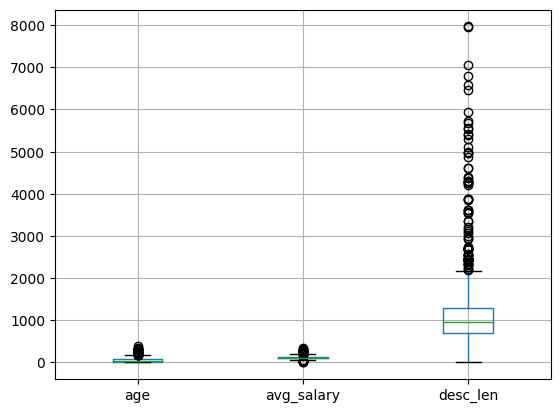

In [21]:
df.boxplot(column = ['age', 'avg_salary', 'desc_len'])

In [22]:
df[['age', 'avg_salary', 'desc_len']].corr

<bound method DataFrame.corr of       age  avg_salary  desc_len
0      41       118.0      4862
1     112       102.0      1444
2      48       138.5      2003
3      23        63.0       873
4      -1        70.0      1247
...   ...         ...       ...
1120  224       159.0      1231
1121   29       145.0       688
1122   24        99.5      1153
1123   -1        65.0      1082
1124  125       113.0      1206

[1125 rows x 3 columns]>

<Axes: >

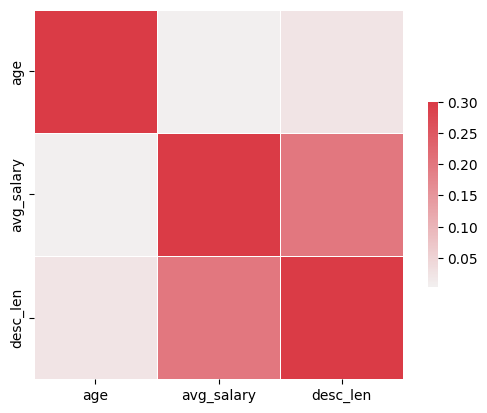

In [23]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [24]:
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'analysis_yn', 'spark', 'aws', 'Excel', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [25]:
df[['Location', 'Size']]

,Location,Size
0,"San Jose, CA",10000+ Employees
1,"Atlanta, GA",10000+ Employees
2,"Redmond, WA",10000+ Employees
3,"The Woodlands, TX",1001 to 5000 Employees
4,Remote,1 to 50 Employees
...,...,...
1120,"New York, NY",10000+ Employees
1121,"Agoura Hills, CA",51 to 200 Employees
1122,Remote,1001 to 5000 Employees
1123,"Trenton, NJ",Unknown


In [26]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'analysis_yn', 'spark', 'aws', 'Excel', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [27]:
df_cat = df[['Location', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state', 'python_yn', 'analysis_yn',
       'spark', 'aws', 'Excel', 'job_simp', 'seniority']]

In [28]:
df_cat

,Location,Size,Type of ownership,Industry,Sector,Revenue,company_txt,job_state,python_yn,analysis_yn,spark,aws,Excel,job_simp,seniority
0,"San Jose, CA",10000+ Employees,Company - Public,Computer Hardware Development,Information Technology,$5 to $10 billion (USD),Adobe,CA,1,1,0,0,0,data scientist,na
1,"Atlanta, GA",10000+ Employees,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD),IBM,GA,0,0,0,0,0,data scientist,na
2,"Redmond, WA",10000+ Employees,Company - Public,Computer Hardware Development,Information Technology,$10+ billion (USD),Microsoft,WA,0,0,0,1,0,data scientist,na
3,"The Woodlands, TX",1001 to 5000 Employees,Company - Private,Chemical Manufacturing,Manufacturing,$10+ billion (USD),CPChem,TX,0,0,0,0,0,data scientist,na
4,Remote,1 to 50 Employees,Company - Public,-1,-1,Unknown / Non-Applicable,IVID TEK INC,Remote,0,0,0,0,1,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,"New York, NY",10000+ Employees,Company - Public,Banking & Lending,Financial Services,$10+ billion (USD),JPMorgan Chase & Co,NY,0,1,0,0,0,na,na
1121,"Agoura Hills, CA",51 to 200 Employees,Company - Private,Advertising & Public Relations,Media & Communication,$5 to $25 million (USD),Cydcor,CA,0,1,0,0,1,data scientist,senior
1122,Remote,1001 to 5000 Employees,Company - Public,Financial Transaction Processing,Financial Services,$1 to $5 billion (USD),Green Dot Corporation,Remote,0,0,0,0,0,data scientist,na
1123,"Trenton, NJ",Unknown,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,S4 Market Data,NJ,0,0,0,0,0,analyst,na


graph for Location: total = 252


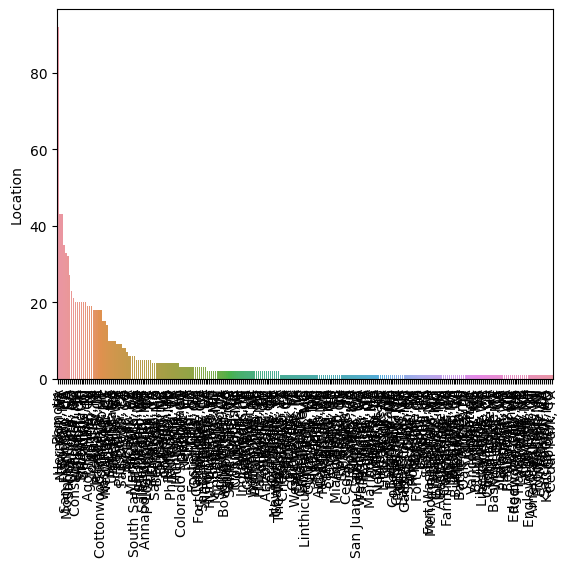

graph for Size: total = 9


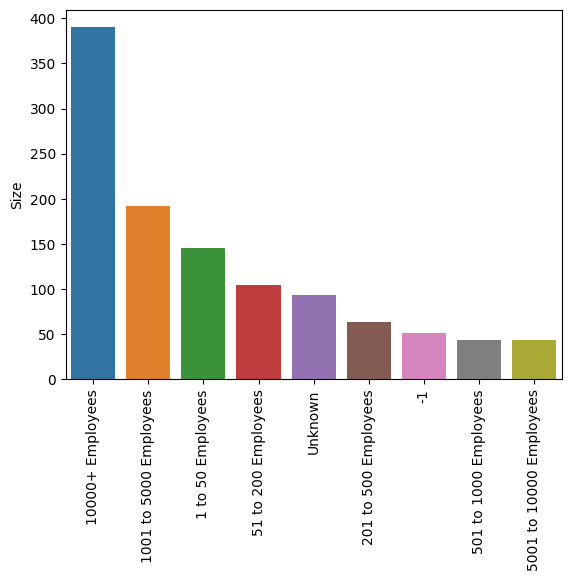

graph for Type of ownership: total = 12


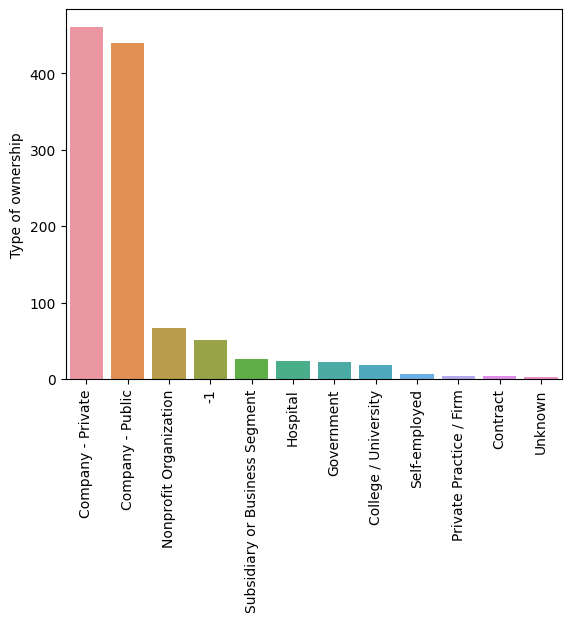

graph for Industry: total = 70


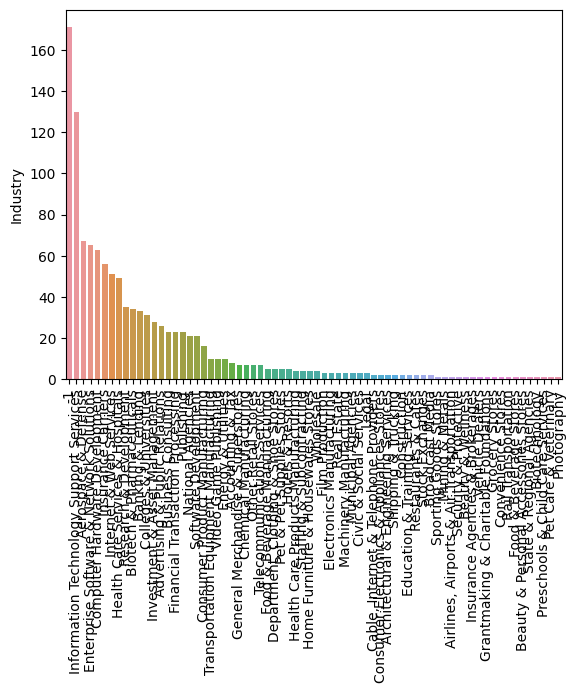

graph for Sector: total = 24


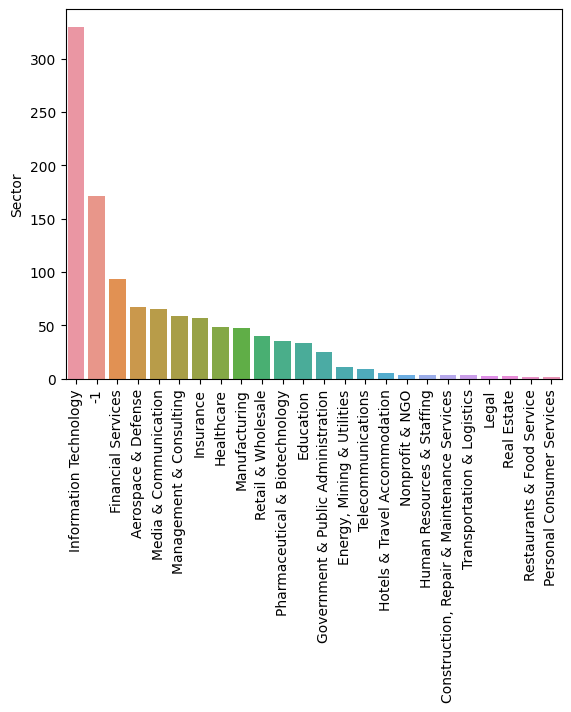

graph for Revenue: total = 11


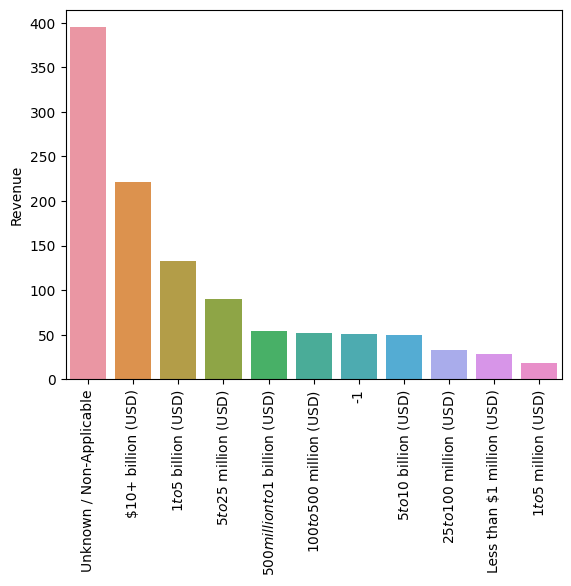

graph for company_txt: total = 554


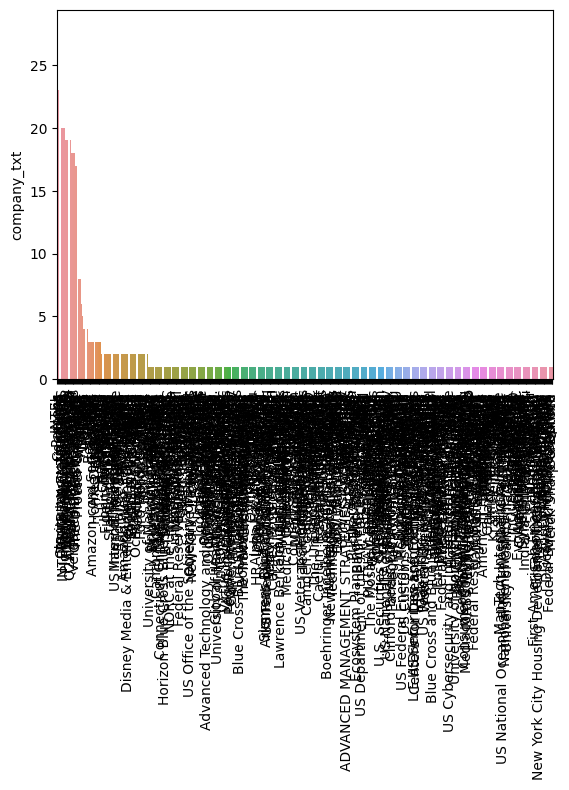

graph for job_state: total = 50


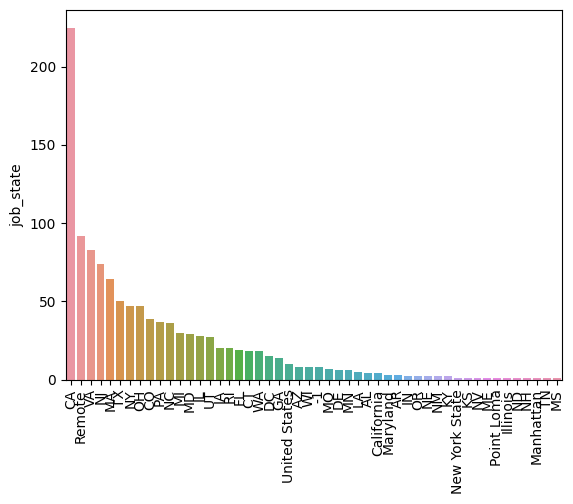

graph for python_yn: total = 2


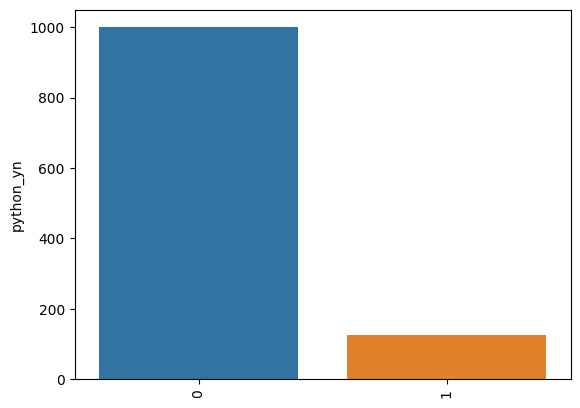

graph for analysis_yn: total = 2


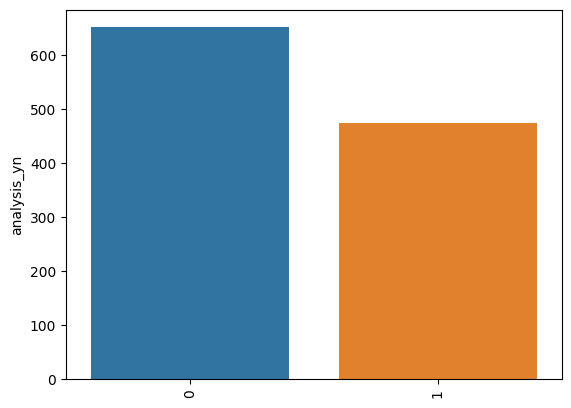

graph for spark: total = 2


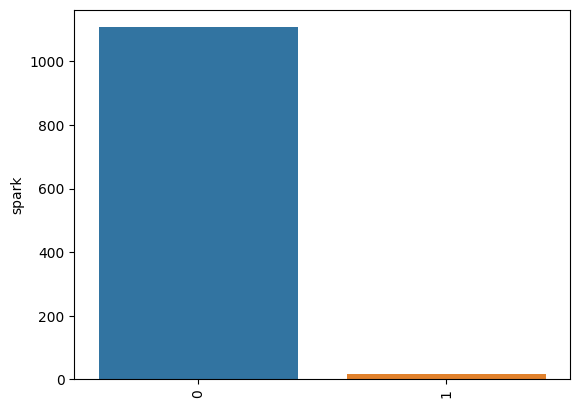

graph for aws: total = 2


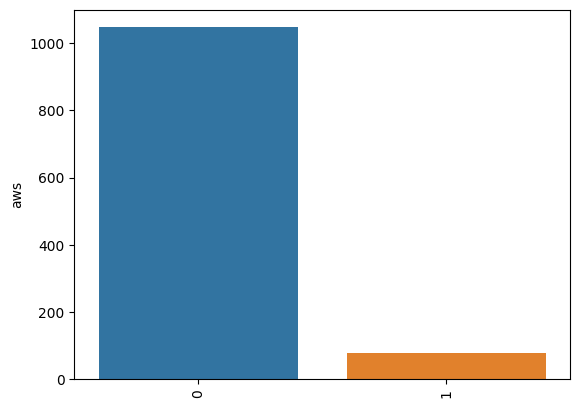

graph for Excel: total = 2


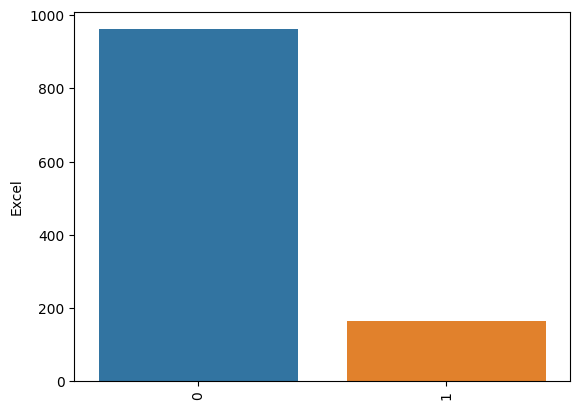

graph for job_simp: total = 7


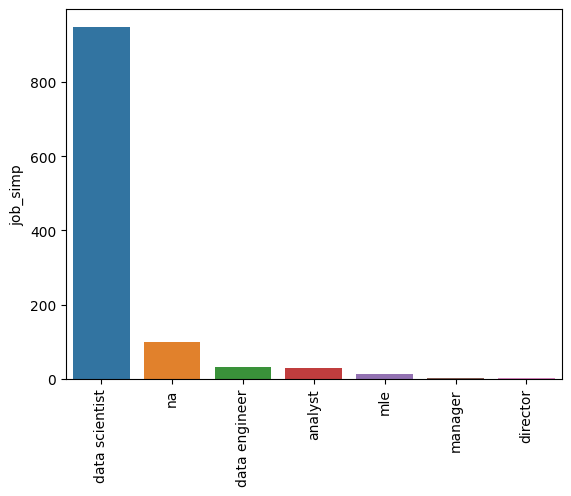

graph for seniority: total = 3


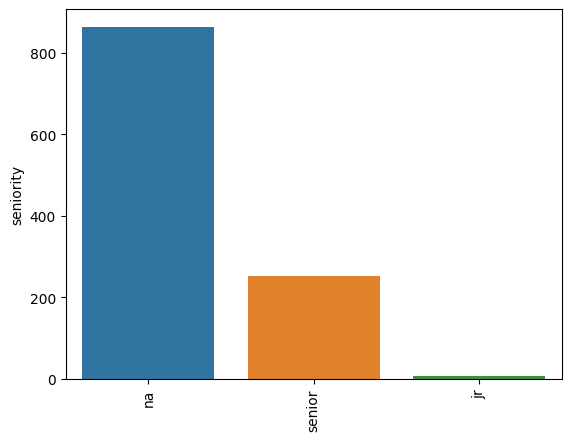

In [29]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'analysis_yn', 'spark', 'aws', 'Excel', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [31]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

,avg_salary
job_simp,
analyst,77.133333
data engineer,79.451613
data scientist,123.016860
director,209.500000
manager,150.166667
mle,161.250000
na,121.055556


In [32]:
pd.pivot_table(df, index=['job_simp', 'seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
analyst        na          72.740741
               senior     116.666667
data engineer  na          73.706897
               senior     162.750000
data scientist jr         109.687500
               na         114.539062
               senior     148.649789
director       na         209.500000
manager        na          88.000000
               senior     181.250000
mle            na         145.214286
               senior     183.700000
na             na         120.431579
               senior     135.875000

In [33]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index=['job_state'], values='avg_salary', aggfunc = 'count').sort_values('avg_salary', ascending=False)

,avg_salary
job_state,
CA,184
VA,81
Remote,70
MA,57
NJ,54
TX,45
OH,44
CO,39
NC,35


In [34]:
pd.set_option('display.max_rows', None)

In [35]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'python_yn', 'analysis_yn', 'spark', 'aws', 'Excel', 'job_simp',
       'seniority', 'desc_len'],
      dtype='object')

In [36]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided', 'python_yn', 'analysis_yn', 'spark', 'aws', 'Excel', 'job_simp', 'seniority', 'desc_len', 'avg_salary']]

In [37]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending= False))
    

Rating
        avg_salary
Rating            
 4.7    168.785714
 4.6    162.833333
 3.5    150.088889
 1.0    150.000000
 4.5    148.326923
 4.3    142.593220
 4.4    139.440000
 2.8    136.916667
 4.0    132.777027
 2.9    126.772727
 3.3    125.571429
 4.2    123.898148
 3.4    123.183333
 5.0    122.575000
 3.2    121.357143
 4.1    121.212871
 3.9    120.545752
 3.8    118.073529
 2.2    118.000000
 3.1    117.759259
 3.6    117.471698
 3.7    115.508475
 3.0    112.532258
 4.9    111.480000
 2.4    109.000000
 2.7    108.666667
 4.8    107.357143
-1.0     95.077778
 2.5     90.000000
 2.6     89.000000
 2.3     60.000000
Industry
                                          avg_salary
Industry                                            
Convenience Stores                        231.500000
Wholesale                                 193.375000
Insurance Agencies & Brokerages           178.000000
Video Game Publishing                     173.850000
Internet & Web Services                

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [ ]:
pd.pivot_table(df_pivots, index='Revenue', columns = 'python_yn', values = 'avg_salary', aggfunc= 'count')

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [ ]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [38]:
df.to_csv('eda_data.csv')